In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

# Read the dataset into a pandas DataFrame
Health_data=pd.read_csv("heart_v2.csv")
Health_data.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
# Display the first few rows of the dataset
Health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:

# Count the occurrences of each unique value in the 'heart disease' column

Health_data["heart disease"].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [5]:
# Separate the features (independent variables) from the target variable ('heart disease')
x = Health_data.drop("heart disease", axis=1)  # Features
y = Health_data["heart disease"]  # Target variable


In [6]:
x.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

## Train Test Split

In [8]:
# Import the necessary function for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with a 70-30 split and a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape

((189, 4), (81, 4))

### Buiding the decision tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [10]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [12]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

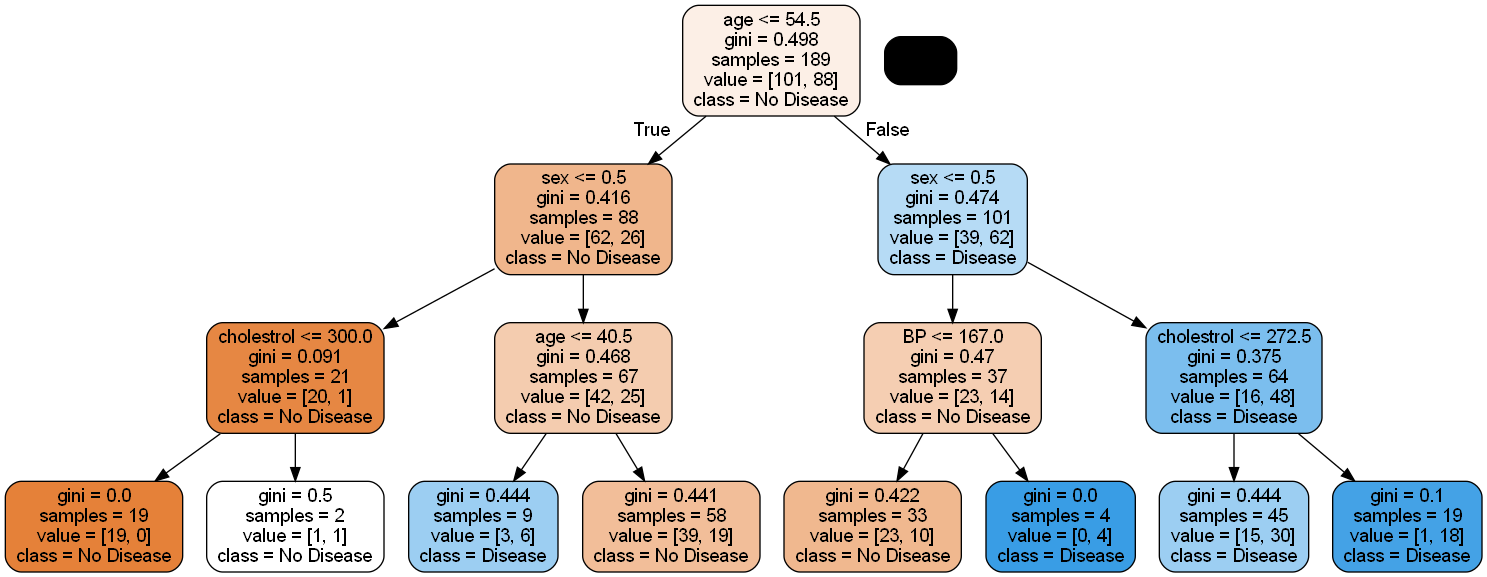

In [13]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dtc, out_file=dot_data, filled=True, rounded=True,
                feature_names=x.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [14]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [15]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)


0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

Creating helper functions to evaluate model performance and help plot the decision tree

In [16]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=x.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [17]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

Desicion Tree without setting any parameter

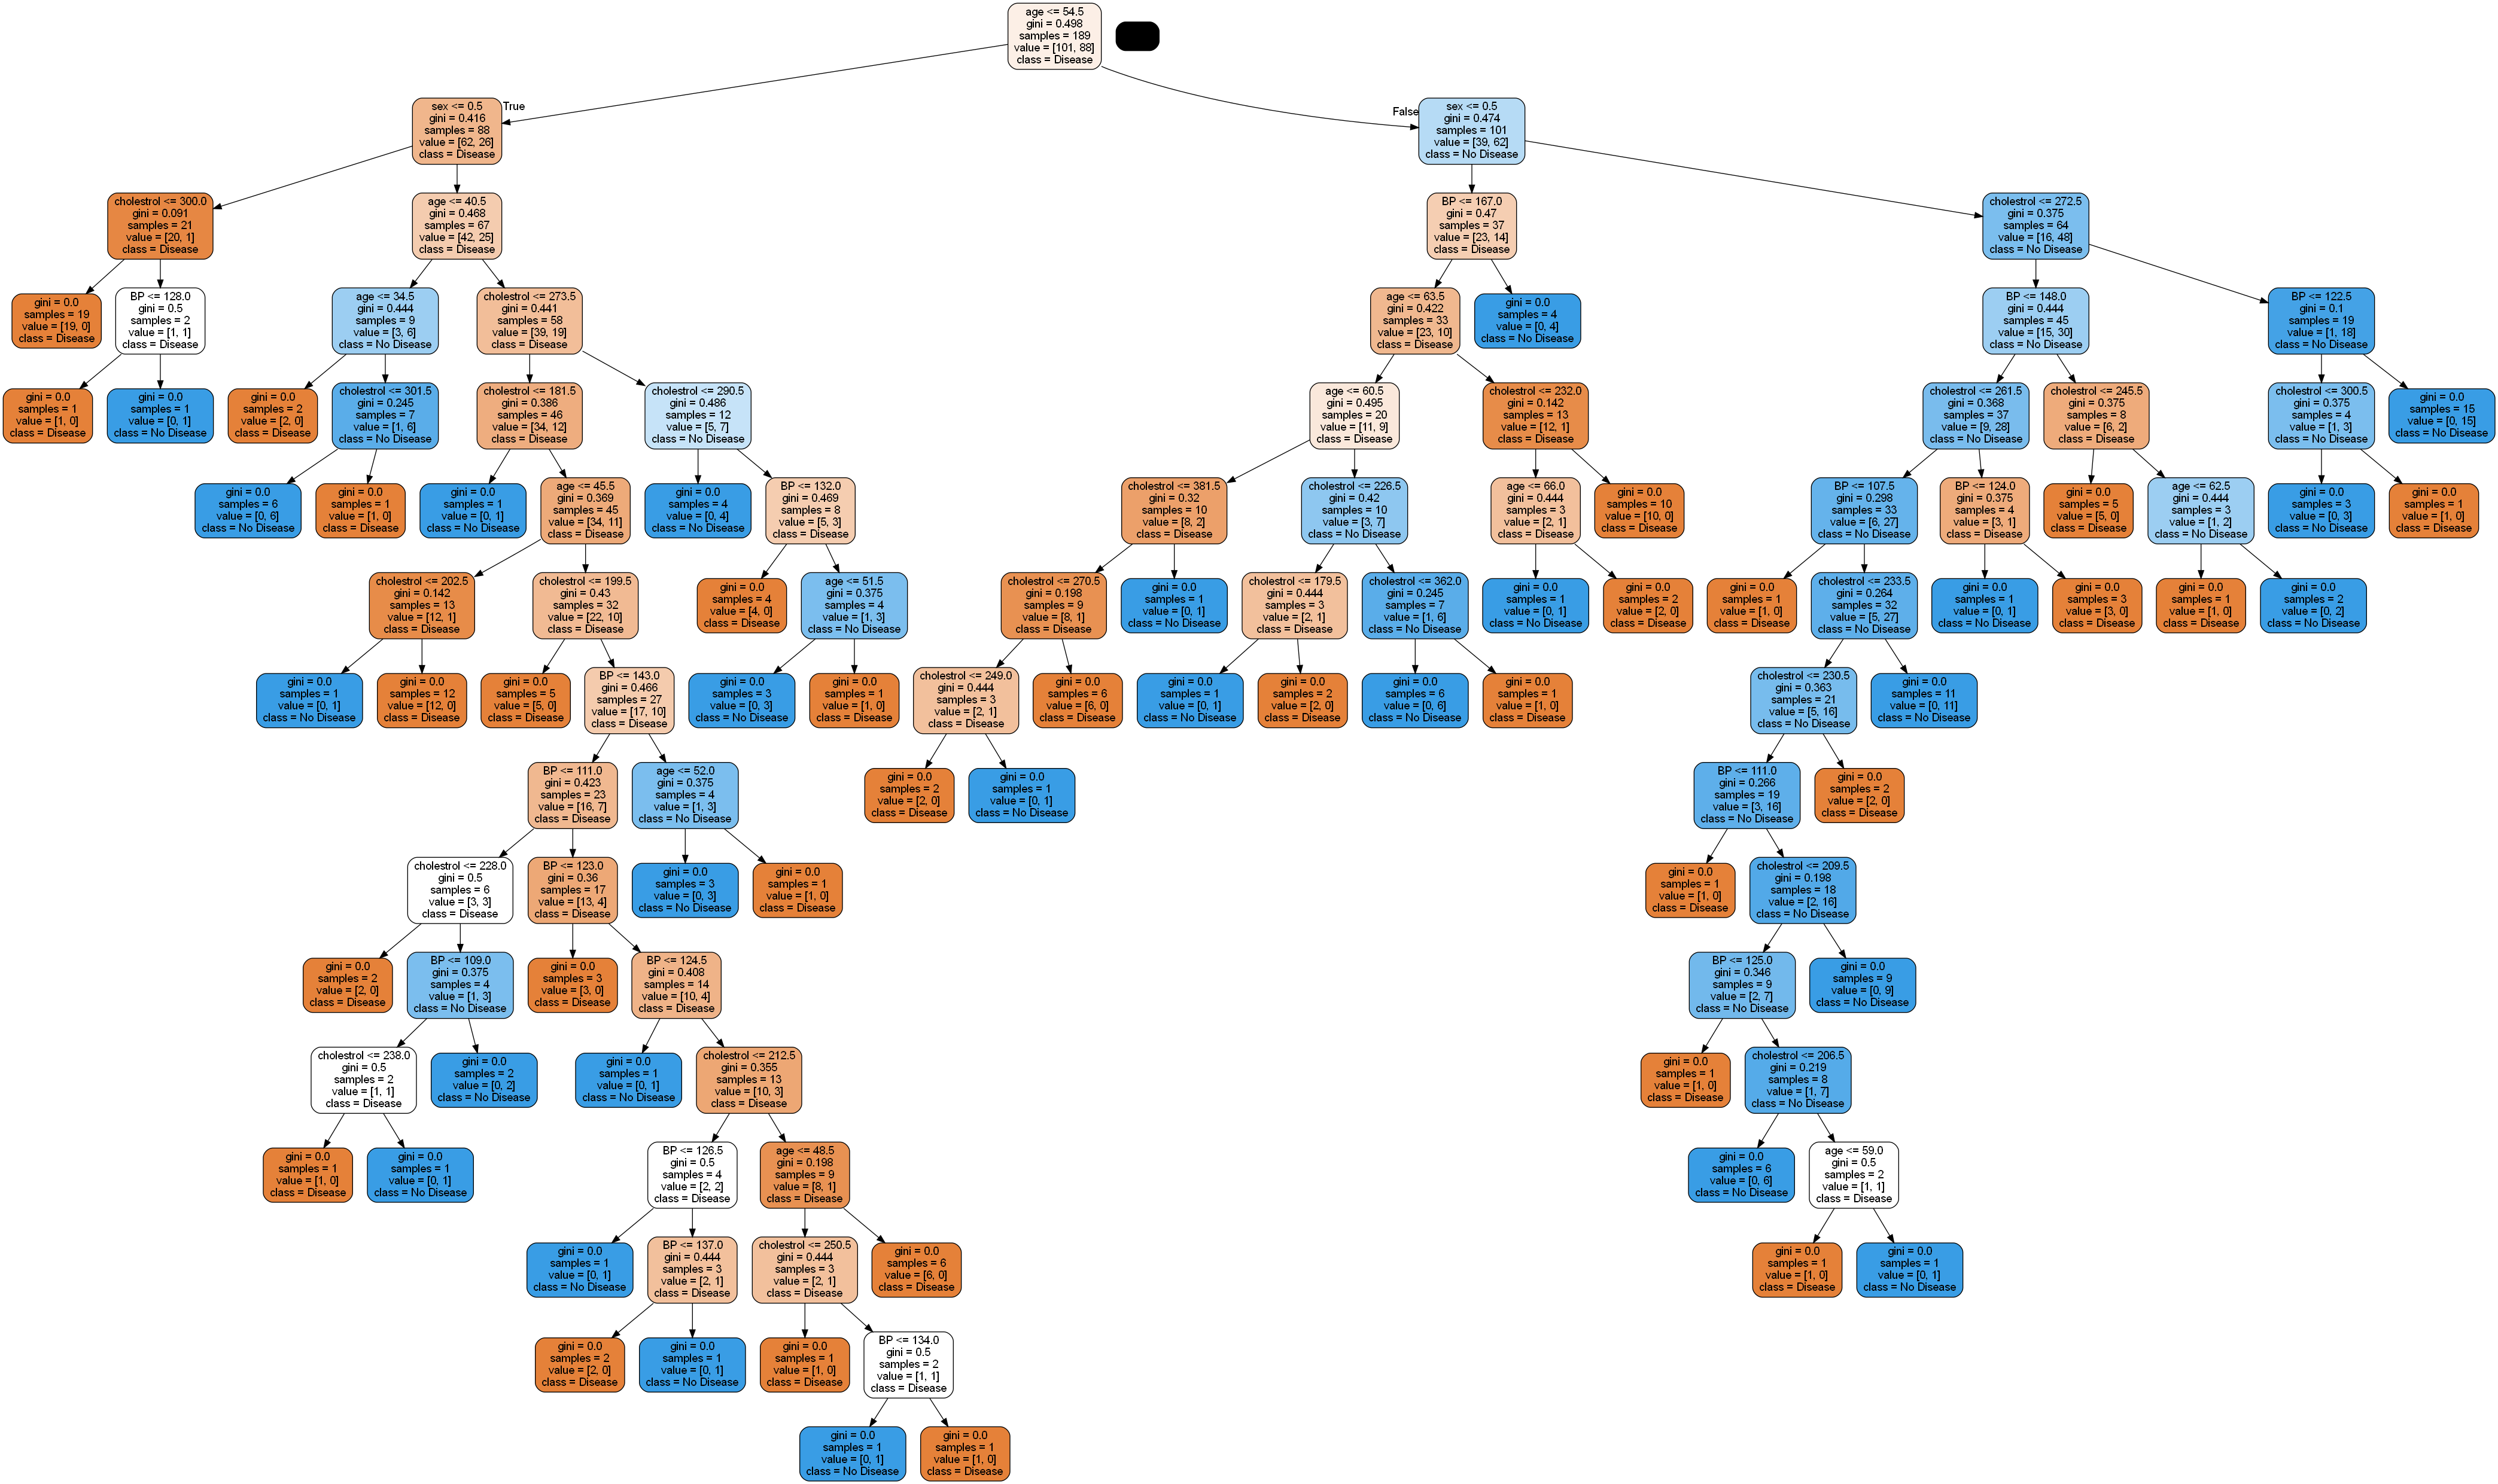

In [18]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [19]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train Confusion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy : 0.6296296296296297
Test Confusion Matrix:
[[31 18]
 [12 20]]


### Controlling the depth of the tree

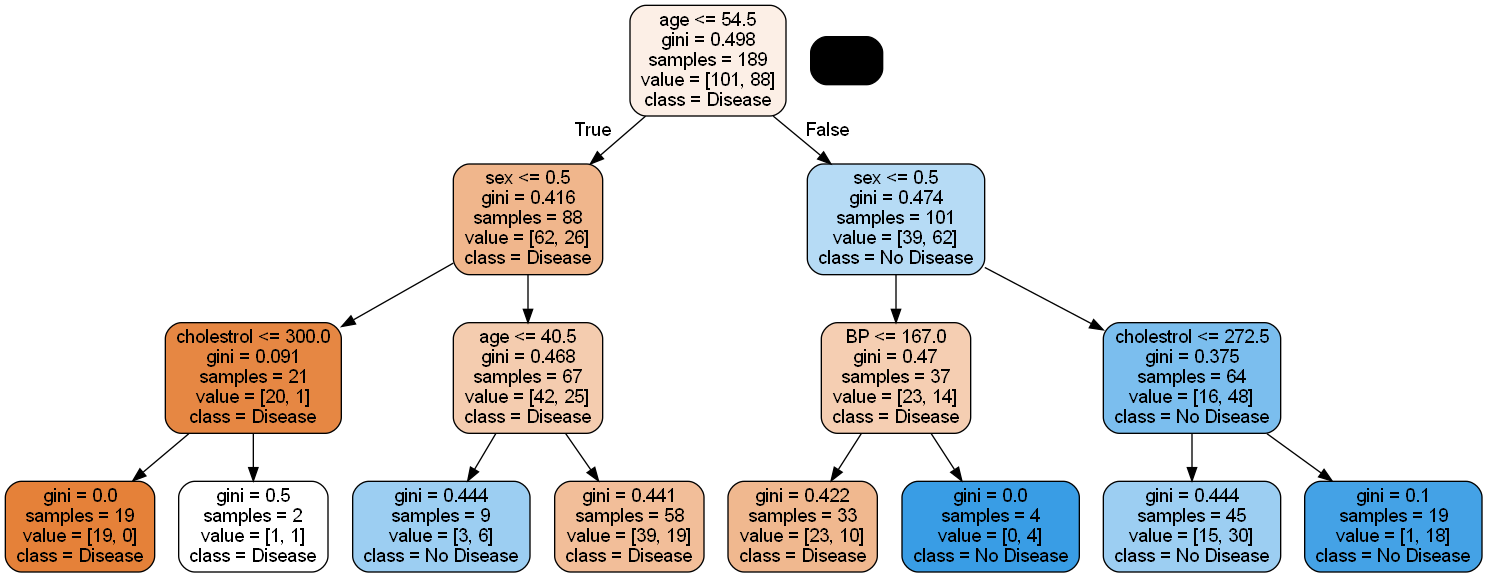

In [20]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)
gph = get_dt_graph(dt_depth) 
Image(gph.create_png())

In [21]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split

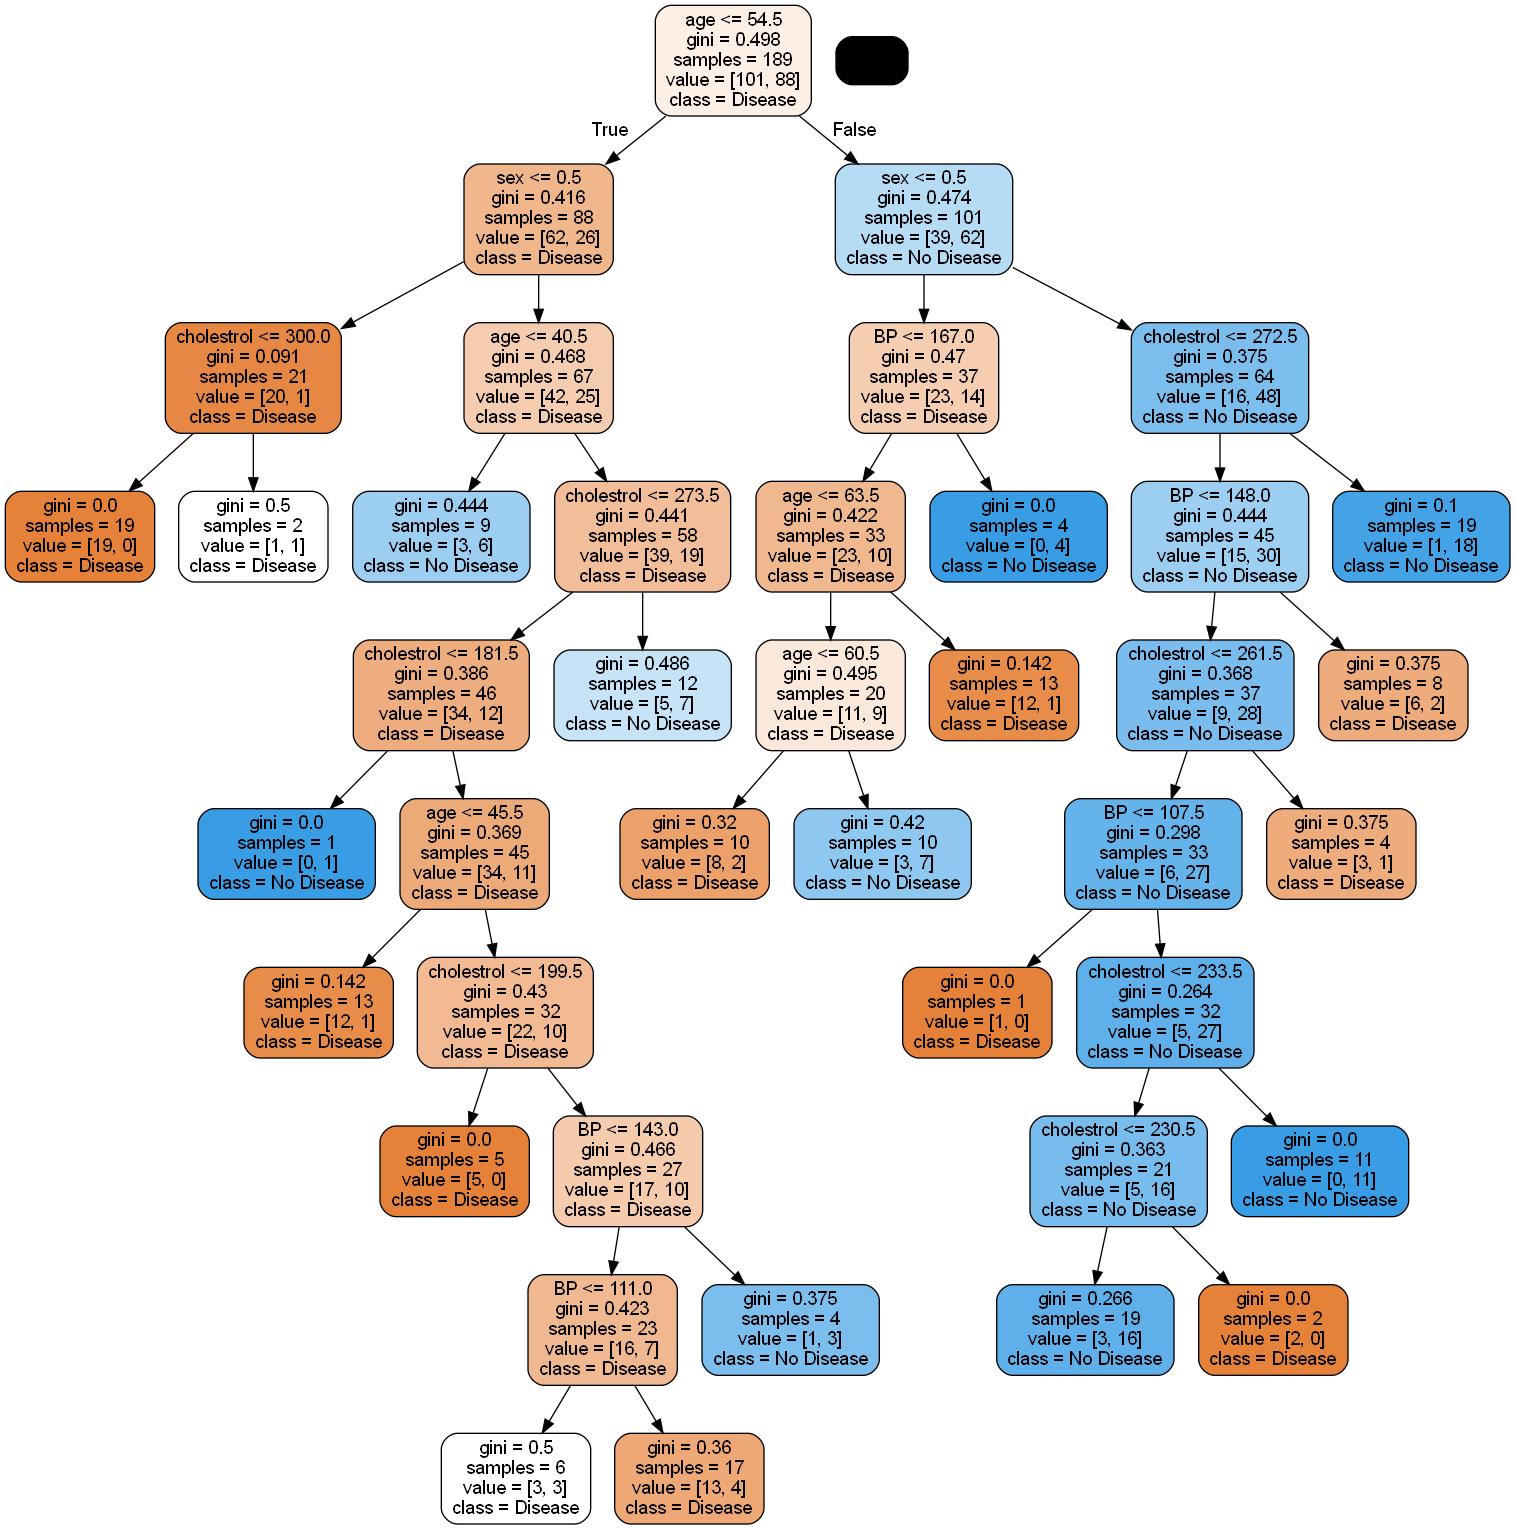

In [22]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)
gph = get_dt_graph(dt_min_split) 
Image(gph.create_png())

In [23]:
evaluate_model(dt_depth)

Train Accuracy : 0.7407407407407407
Train Confusion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy : 0.6049382716049383
Test Confusion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples in leaf node

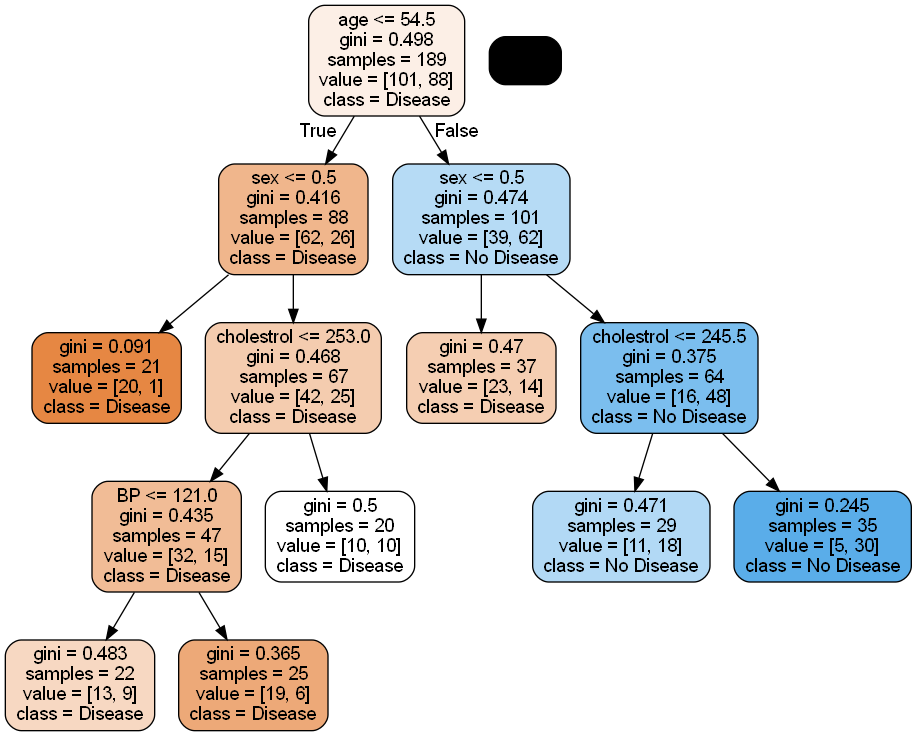

In [24]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [25]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini

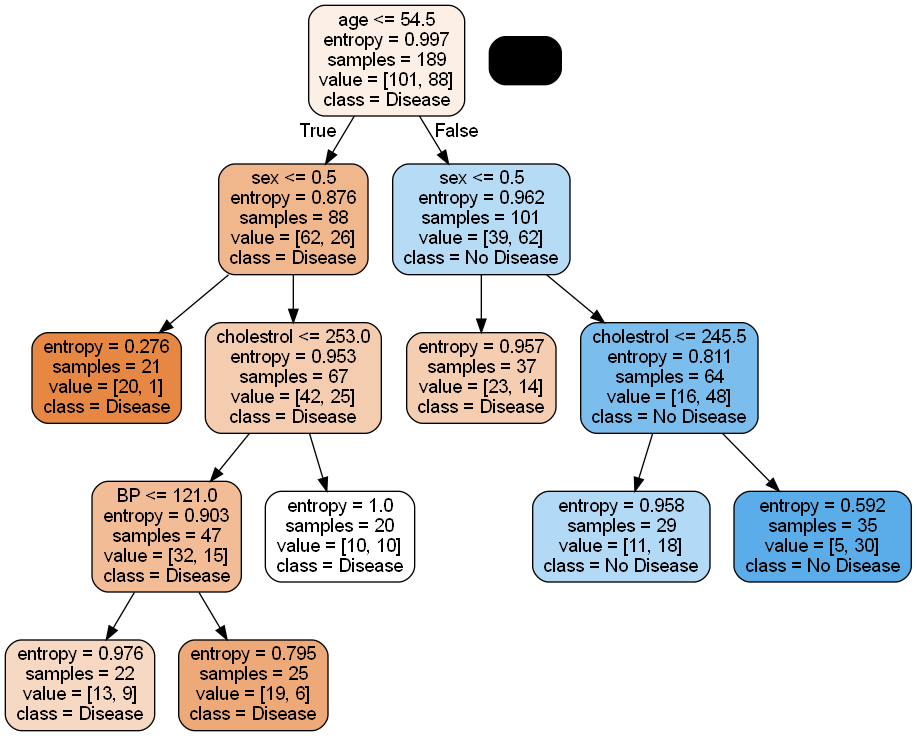

In [26]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [27]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.7037037037037037
Train Confusion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning

In [28]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20,30],
    'min_samples_leaf': [5, 10, 20, 50,75,100],
    'criterion': ["gini", "entropy"]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtc, 
                           param_grid=params, 
                           cv=21, n_jobs=2, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)

Fitting 21 folds for each of 72 candidates, totalling 1512 fits


GridSearchCV(cv=21, estimator=DecisionTreeClassifier(random_state=42), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 75, 100]},
             scoring='accuracy', verbose=1)

In [29]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013866,0.008621,0.007578,0.002721,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.666667,...,0.555556,0.777778,0.777778,0.888889,0.777778,0.444444,0.777778,0.703704,0.129818,2
1,0.010803,0.003194,0.007092,0.002994,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.666667,...,0.555556,0.777778,0.777778,0.888889,0.777778,0.444444,0.777778,0.703704,0.129818,2
2,0.007487,0.001540,0.006623,0.001862,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.666667,...,0.555556,0.777778,0.777778,0.888889,0.777778,0.444444,0.777778,0.703704,0.129818,2
3,0.008201,0.001594,0.005093,0.001172,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.777778,0.555556,...,0.444444,0.777778,0.555556,0.888889,0.777778,0.666667,0.666667,0.650794,0.134062,33
4,0.008593,0.002098,0.005627,0.001612,gini,2,75,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.777778,0.555556,...,0.444444,0.777778,0.555556,0.888889,0.777778,0.666667,0.666667,0.656085,0.145093,21


In [30]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,split20_test_score,mean_test_score,std_test_score,rank_test_score
12,0.012623,0.002623,0.007229,0.003331,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.444444,0.666667,...,0.777778,0.666667,0.555556,0.666667,0.666667,0.666667,0.777778,0.714286,0.116642,1
0,0.013866,0.008621,0.007578,0.002721,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.666667,...,0.555556,0.777778,0.777778,0.888889,0.777778,0.444444,0.777778,0.703704,0.129818,2
1,0.010803,0.003194,0.007092,0.002994,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.666667,...,0.555556,0.777778,0.777778,0.888889,0.777778,0.444444,0.777778,0.703704,0.129818,2
2,0.007487,0.001540,0.006623,0.001862,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.666667,...,0.555556,0.777778,0.777778,0.888889,0.777778,0.444444,0.777778,0.703704,0.129818,2
8,0.016366,0.014919,0.013920,0.019090,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.666667,...,0.555556,0.777778,0.777778,0.888889,0.777778,0.444444,0.777778,0.703704,0.129818,2


In [31]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [32]:
grid_search.best_score_

0.7142857142857142

In [33]:
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)

Train Accuracy : 0.7936507936507936
Train Confusion Matrix:
[[86 15]
 [24 64]]
--------------------------------------------------
Test Accuracy : 0.6419753086419753
Test Confusion Matrix:
[[35 14]
 [15 17]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71        49
           1       0.55      0.53      0.54        32

    accuracy                           0.64        81
   macro avg       0.62      0.62      0.62        81
weighted avg       0.64      0.64      0.64        81



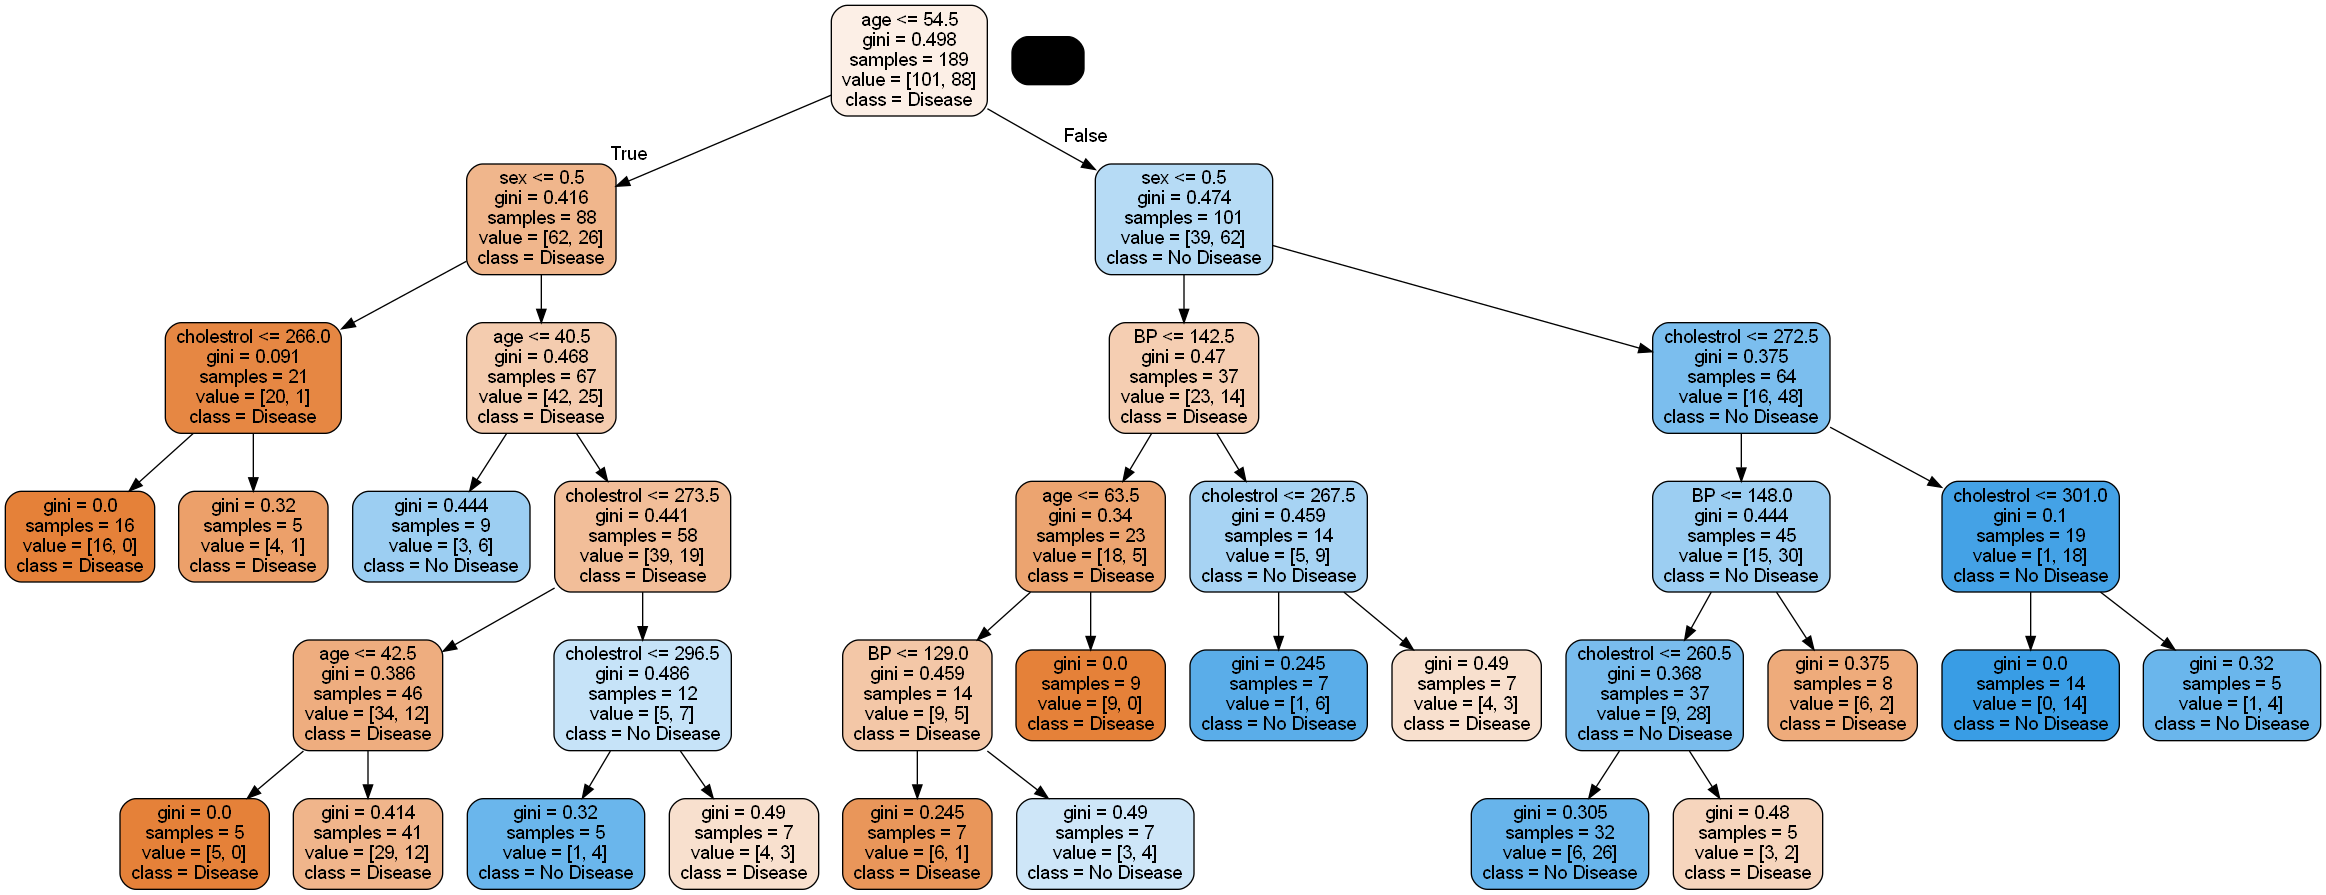

In [35]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

## Using Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
X_train.head()

,age,sex,BP,cholestrol
84,57,1,110,201
251,44,1,130,219
92,54,1,124,266
201,58,1,125,300
126,62,1,120,267


In [46]:
rf=RandomForestClassifier(random_state=42,max_depth=3,n_estimators=10,oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [47]:
rf.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

In [48]:
sample_tree= rf.estimators_[4]

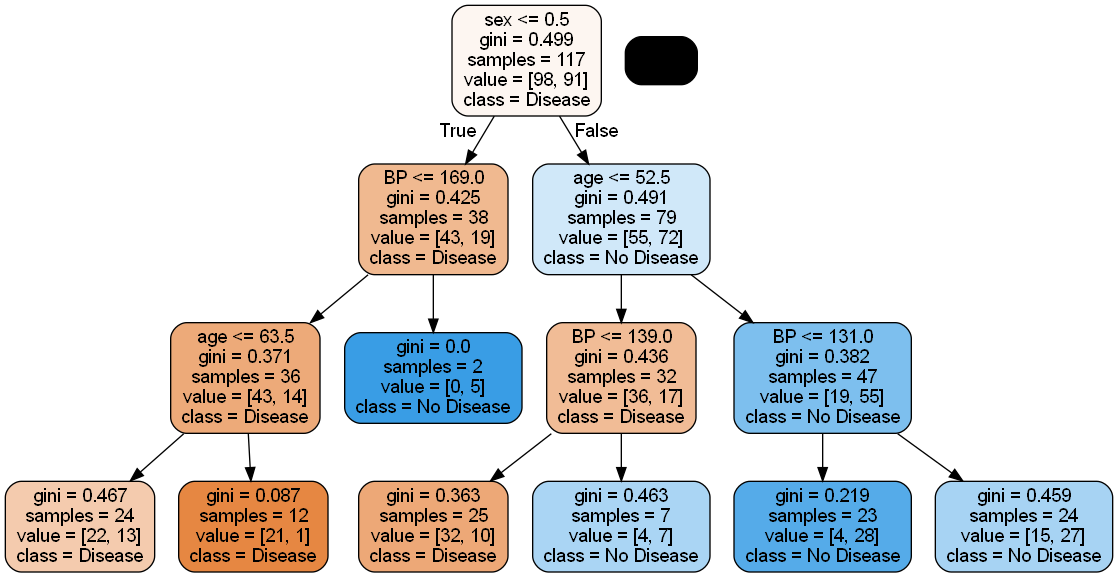

In [49]:
gph=get_dt_graph(sample_tree)
Image(gph.create_png())

In [50]:
rf.oob_score_

0.6349206349206349

### Grid Search for Hyperparameter tuning

In [51]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [53]:
%%time
grid_search.fit(x,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits
CPU times: total: 6.23 s
Wall time: 5min 54s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [54]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, max_features=3, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [55]:
evaluate_model(rf_best)

Train Accuracy : 0.8042328042328042
Train Confusion Matrix:
[[87 14]
 [23 65]]
--------------------------------------------------
Test Accuracy : 0.8024691358024691
Test Confusion Matrix:
[[42  7]
 [ 9 23]]


In [56]:
sample_tree = rf_best.estimators_[0]

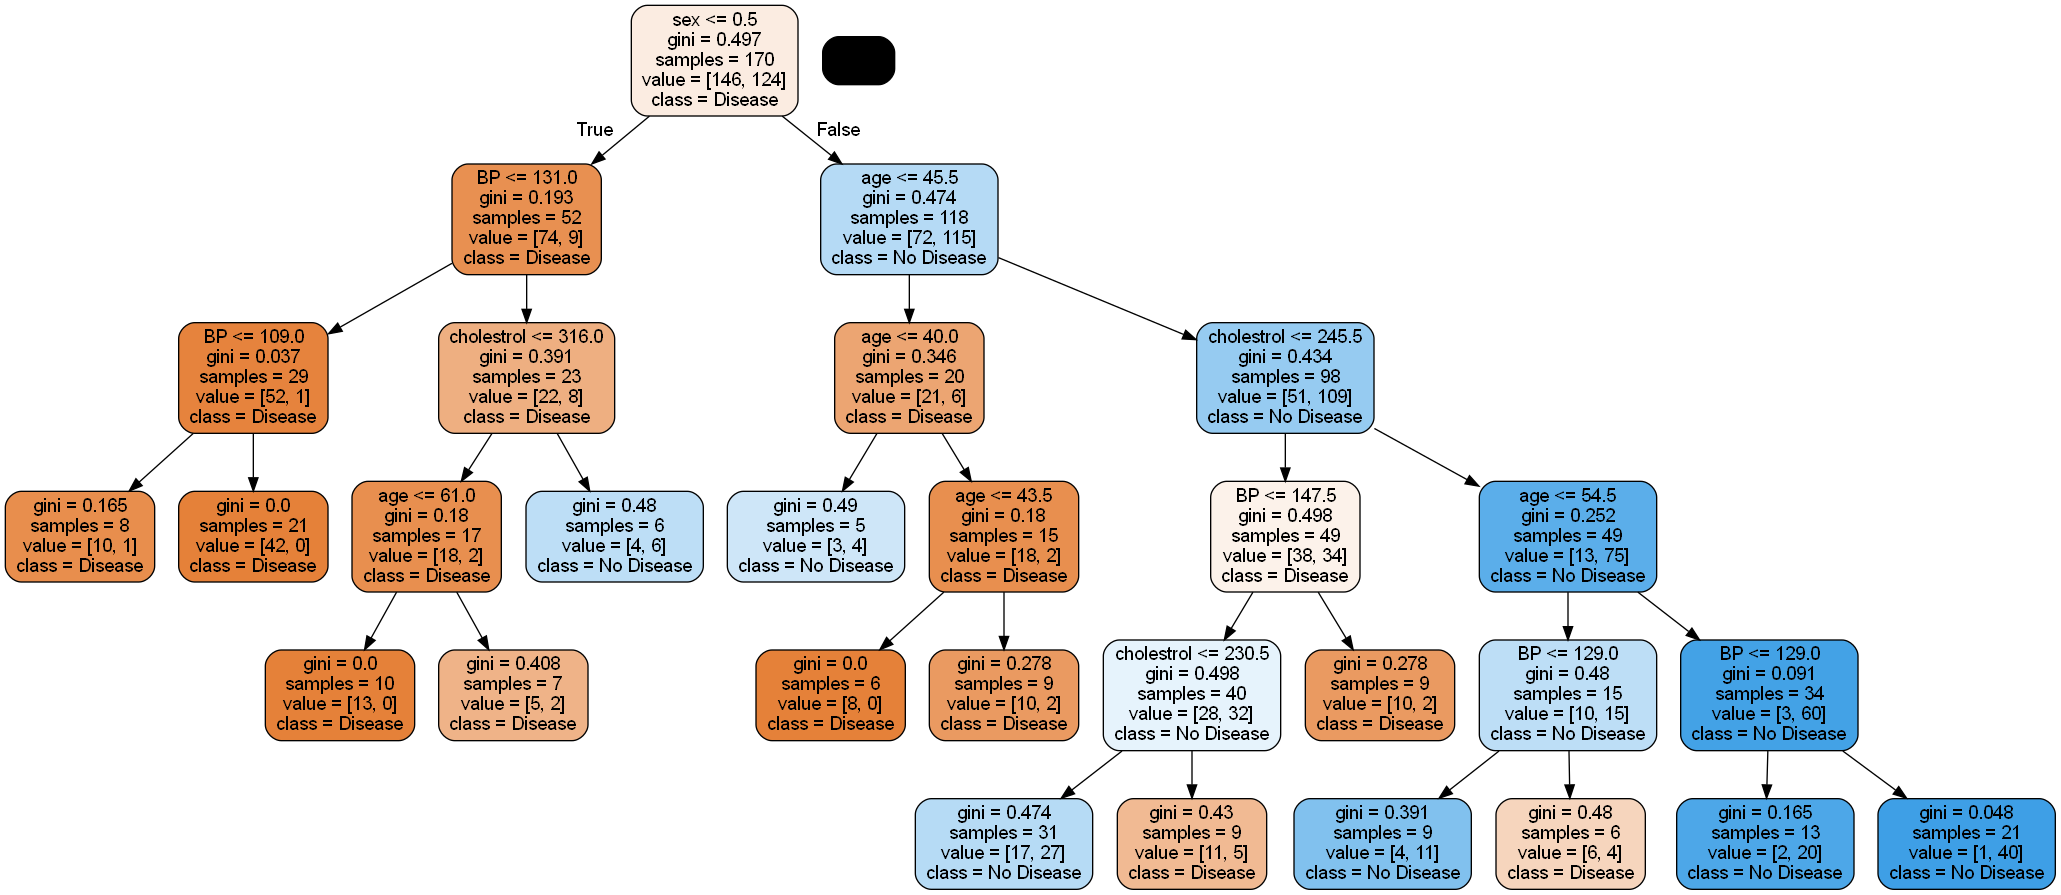

In [57]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())


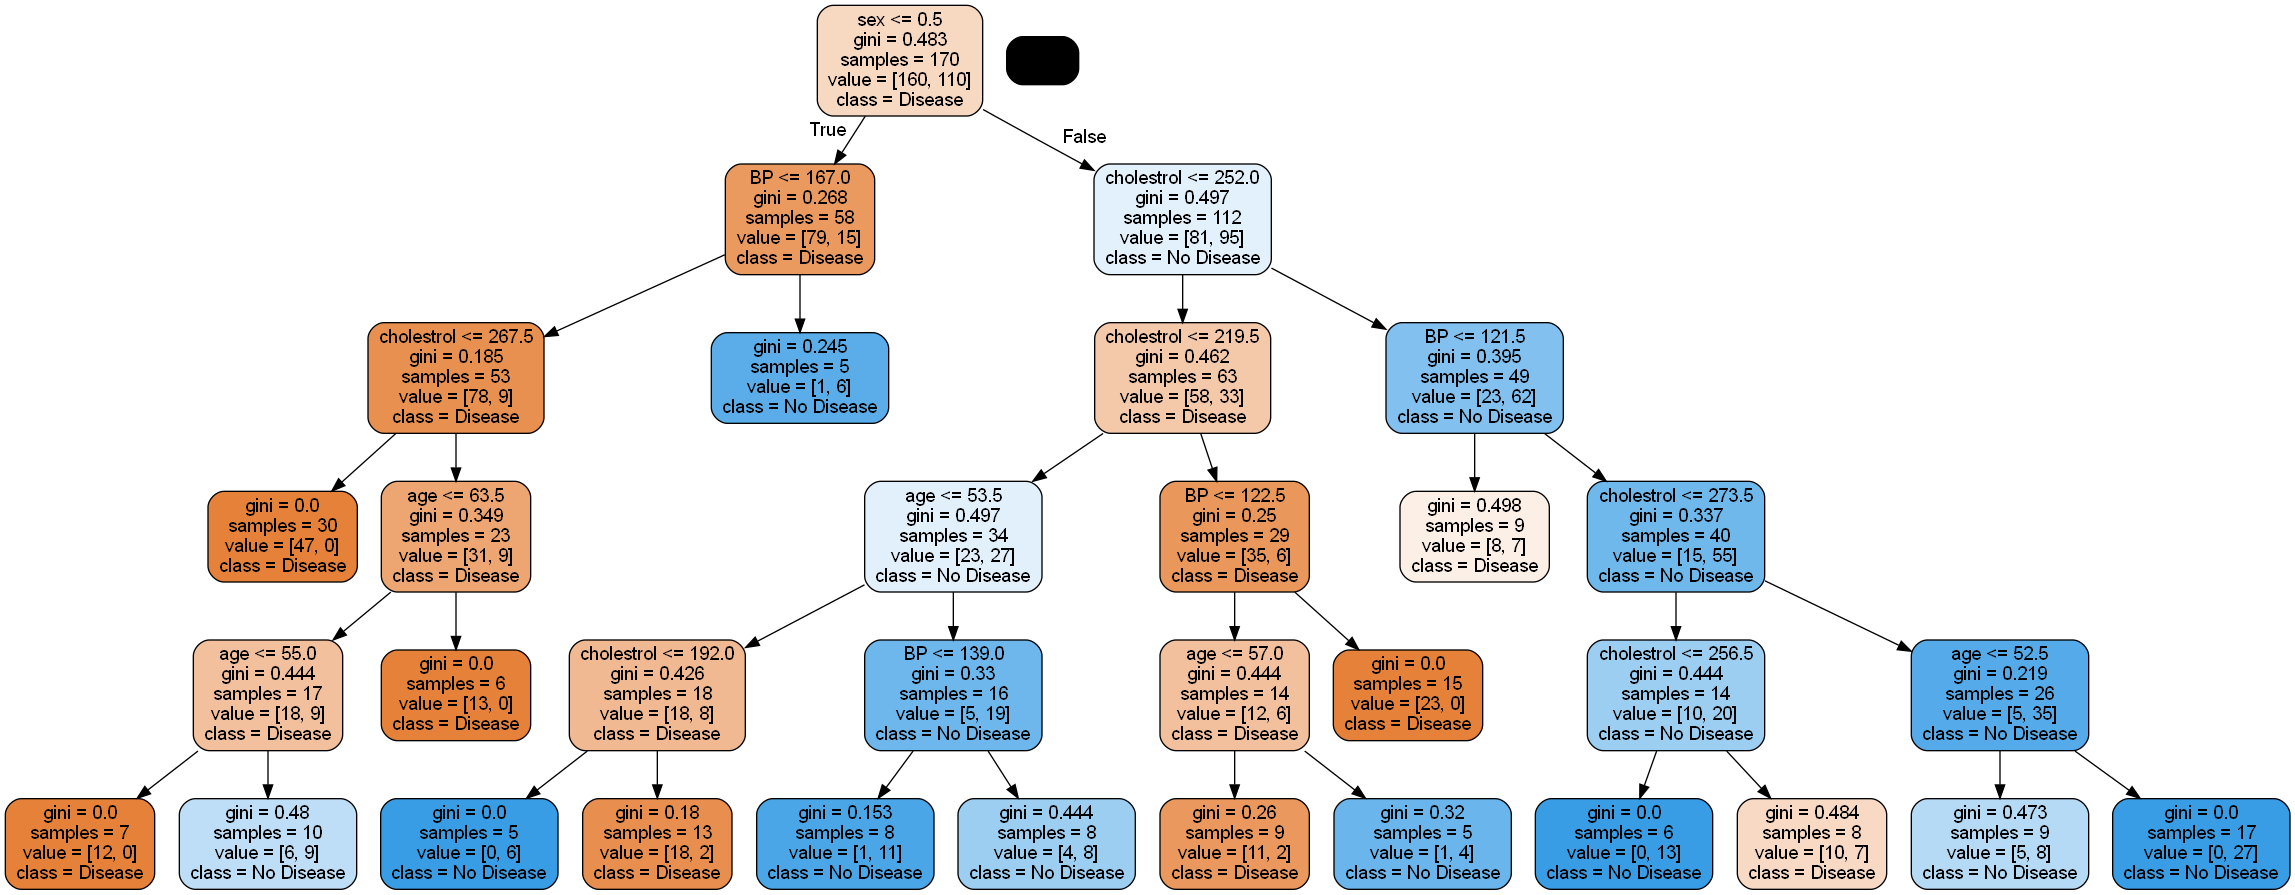

In [58]:
gph = get_dt_graph(rf_best.estimators_[10])
Image(gph.create_png(), height=600, width=600)


Variable importance in RandomForest and Decision trees

In [59]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [60]:
classifier_rf.feature_importances_
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": classifier_rf.feature_importances_
})

In [61]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.375397
3,cholestrol,0.278449
2,BP,0.208346
1,sex,0.137808
